# Stock Prediction Model With LSTM

In [2]:
# Import Necessary Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os
import tensorflow as tf

In [3]:
# Read data set
df = pd.read_csv('Desktop/samsung_train.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,10480.0,10500.0,10420.0,10440.0,0.005810,683350.0
1,2010-01-05,10540.0,10620.0,10500.0,10600.0,0.005899,657750.0
2,2010-01-06,10640.0,10760.0,10400.0,10760.0,0.005988,1577900.0
3,2010-01-07,10820.0,10820.0,10460.0,10580.0,0.005888,1717500.0
4,2010-01-08,10720.0,10720.0,10480.0,10520.0,0.005854,642350.0


In [4]:
print(pd.isnull(df).sum())

Date          0
Open         78
High         78
Low          78
Close        78
Adj Close    78
Volume       78
dtype: int64


In [6]:
# Dropping all Na rows
df = df.dropna()

In [7]:
print(pd.isnull(df).sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [8]:
#preprocessing our data

df = df['Close'].values
df = df.reshape(-1,1)
print(df.shape) #shape Check
df[:7]

(2359, 1)


array([[10440.],
       [10600.],
       [10760.],
       [10580.],
       [10520.],
       [10200.],
       [10380.]])

In [9]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(1887, 1)
(522, 1)


In [10]:
#Normalization
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:7]

array([[0.03064771],
       [0.035703  ],
       [0.04075829],
       [0.03507109],
       [0.03317536],
       [0.02306477],
       [0.02875197]])

In [11]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:7]

array([[0.84012638],
       [0.83823065],
       [0.85023697],
       [0.87488152],
       [0.86034755],
       [0.85971564],
       [0.8628752 ]])

In [12]:
def create_my_dataset(df):
    x = []
    y = []
    for i in range(50,df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [13]:
x_train, y_train = create_my_dataset(dataset_train)
x_train[:1]

array([[0.03064771, 0.035703  , 0.04075829, 0.03507109, 0.03317536,
        0.02306477, 0.02875197, 0.02180095, 0.02875197, 0.02875197,
        0.02938389, 0.0300158 , 0.03759874, 0.04202212, 0.035703  ,
        0.03696682, 0.02938389, 0.02116904, 0.02116904, 0.02496051,
        0.01800948, 0.02432859, 0.02559242, 0.02306477, 0.01169036,
        0.01548183, 0.01263823, 0.01200632, 0.0192733 , 0.01990521,
        0.0192733 , 0.02180095, 0.01864139, 0.01548183, 0.01990521,
        0.01200632, 0.00758294, 0.        , 0.00884676, 0.0164297 ,
        0.01421801, 0.01200632, 0.01421801, 0.01611374, 0.01421801,
        0.01611374, 0.01484992, 0.01674566, 0.01990521, 0.02180095]])

In [14]:
y_train[:1]

array([0.02938389])

In [15]:
x_test, y_test = create_my_dataset(dataset_test)
x_test[:1]

array([[0.84012638, 0.83823065, 0.85023697, 0.87488152, 0.86034755,
        0.85971564, 0.8628752 , 0.86477093, 0.87172196, 0.88436019,
        0.91469194, 0.90205371, 0.9014218 , 0.90078989, 0.91090047,
        0.91469194, 0.88941548, 0.9014218 , 0.87740916, 0.88246445,
        0.86919431, 0.87993681, 0.89826224, 0.89004739, 0.91279621,
        0.91974724, 0.92796209, 0.9563981 , 0.95134281, 0.97725118,
        0.96524487, 0.96777251, 0.9778831 , 1.        , 0.98862559,
        0.96650869, 0.9507109 , 0.96082148, 0.91406003, 0.92101106,
        0.91532385, 0.93870458, 0.88688784, 0.88815166, 0.89763033,
        0.91406003, 0.88309637, 0.87235387, 0.83823065, 0.85655608]])

In [16]:
#reshaping for LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
print(x_train.shape)
print(x_test.shape)

(1837, 50, 1)
(472, 50, 1)


In [17]:
tf.logging.set_verbosity(tf.logging.ERROR)
model = Sequential()
model.add(LSTM(units= 100, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units= 100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units= 100))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 100)           40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 100)           80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [19]:
model.compile(loss='mean_squared_error', optimizer ='adam')

In [20]:
model.fit(x_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
1837/1837 [==============================] - 39s 21ms/step - loss: 0.0101
Epoch 2/50
1837/1837 [==============================] - 28s 15ms/step - loss: 0.0015
Epoch 3/50
1837/1837 [==============================] - 31s 17ms/step - loss: 0.0013
Epoch 4/50
1837/1837 [==============================] - 30s 16ms/step - loss: 0.0014
Epoch 5/50
1837/1837 [==============================] - 30s 16ms/step - loss: 0.0014
Epoch 6/50
1837/1837 [==============================] - 36s 20ms/step - loss: 0.0012
Epoch 7/50
1837/1837 [==============================] - 38s 21ms/step - loss: 0.0013
Epoch 8/50
1837/1837 [==============================] - 39s 21ms/step - loss: 0.0011
Epoch 9/50
1837/1837 [==============================] - 33s 18ms/step - loss: 0.0011
Epoch 10/50
1837/1837 [==============================] - 29s 16ms/step - loss: 0.0013
Epoch 11/50
1837/1837 [==============================] - 34s 19ms/step - loss: 0.0013
Epoch 12/50
1837/1837 [==============================] - 32s 17

range(1887, 2359)


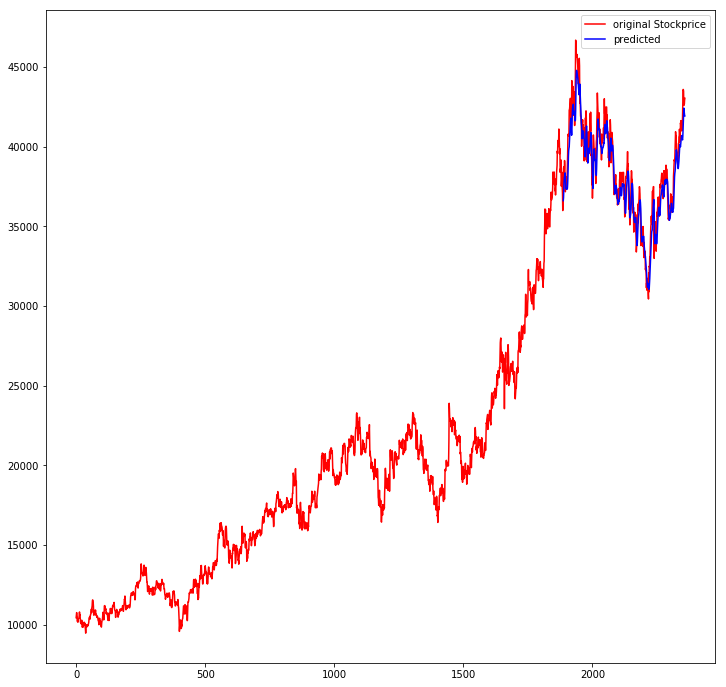

In [21]:
#visualizing our predictions
%matplotlib inline
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(12,12))
plt.plot(df, color='red', label='original Stockprice')
ax.plot(range(len(y_train)+50, len(y_train)+50+len(predictions)),predictions,color='blue', label='predicted')
plt.legend()
print(range(len(y_train)+50, len(y_train)+50+len(predictions)))

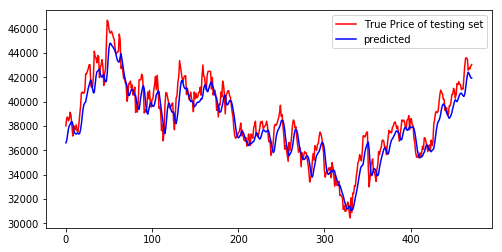

In [22]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label = 'True Price of testing set')
plt.plot(predictions, color = 'blue', label='predicted')
plt.legend()